See the decribtion about the data and the data itself here -> https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("breast-cancer.csv")

## Analyzing

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since Pandas creates id's in an ascending order, let's get rid of initial id column.

In [4]:
df.drop(["id"],axis=1, inplace = True)

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

It's always good to know if the data has null values so we can fill them out. In this case, no null values in any of the columns. 

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Now, let's get some information about the data. 

In [8]:
len(df)

569

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The data has 30 main features out of which 29 are numerical, while the only categorical column is diagnosis. Diagnosis column is a target column, in a sense of resulting into either M - Malignant or  B - Benign, depending on other 29 numerical column values. It looks like the data is suitable for building a classification model for predicting the diagnosis of breast cancer. Of course, the data is very small in size, only 569 observations, but the good news is there are no null values, no sparcity at all. 

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The describtion of the dataset gives us an information about the numerical data columns, their means medians and 1st, 2nd, 3rd quantiles along with the min, max values and std. From the table above it is visible that the ranges of the features are from various ranges, thus if we are going to apply any classification mode, I would suggest normalizing data. For normalization, you can uncomment and run the code below. 

In [11]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# columns_norm = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# df[columns_norm] = scaler.fit_transform(df[columns_norm])


## Visualizing

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

The plot below shows how the diagnosis are distributed. You can see that the diagnosis of Bening exceed the diagnosis of Malignant. See the numbers also in the code. 

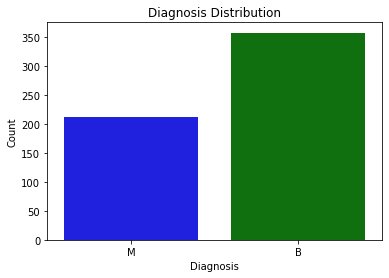

Diagnosed as Malignant: 212
Diagnosed as Bening: 357


In [13]:
sns.countplot(x='diagnosis', data=df, palette=['blue', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Distribution')
plt.show()

print("Diagnosed as Malignant:", len(df.diagnosis[df.diagnosis == "M"]))
print("Diagnosed as Bening:",len(df.diagnosis[df.diagnosis == "B"]))

The second one is a scatter plot of the mean radius and mean texture. It shows that there is a strong positive connection between these two, meaning that when the mean radius of the cancer increases, the mean texture increases as well. 

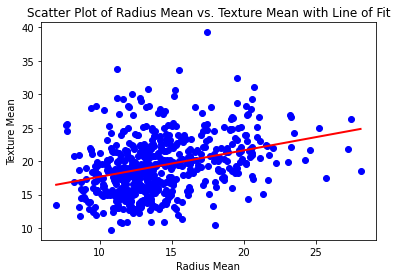

In [14]:
x = df['radius_mean']
y = df['texture_mean']

coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

x_line = np.linspace(x.min(), x.max(), 100)

plt.scatter(x, y, color = "blue")
plt.plot(x_line, line(x_line), color='red', linewidth=2)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot of Radius Mean vs. Texture Mean with Line of Fit')
plt.show()


The boxplot below represents the mean area distributions for each diagnosis. You can see how the mean of Area Mean is around 1000 for M and almost 500 for B diagnosis. Same way you can see the quantiles and the outliers of Area Mean column for each diagnosis.
Actually same thing is done in the fourth plot, but this time with violin plots. Here you can see all the information from the boxplots, plus the approximate distributions of M and B in a sense of mean areas. 

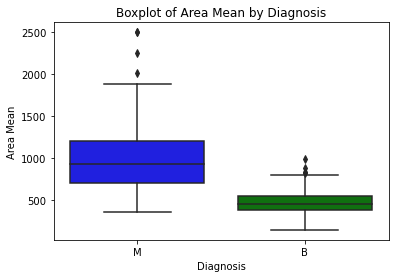

In [15]:
sns.boxplot(x='diagnosis', y='area_mean', data=df, palette=['blue', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.title('Boxplot of Area Mean by Diagnosis')
plt.show()


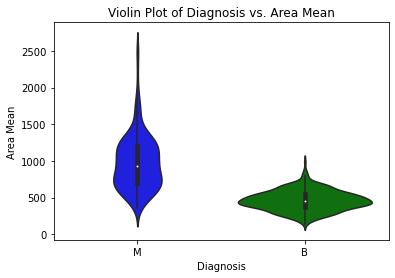

In [16]:
sns.violinplot(x='diagnosis', y='area_mean', data=df,palette=['blue', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.title('Violin Plot of Diagnosis vs. Area Mean')
plt.show()

Using the barplot below we can analyze Mean Radiuses minimum values for each of the diagnosis. You can create such barplots by changing the column name (madatory to be a numeric one) and/or the metric (mean, median, max, so on)

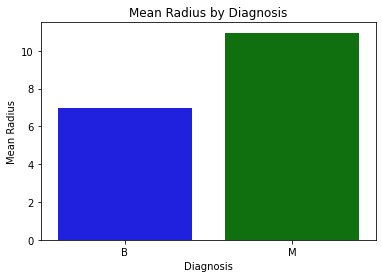

In [17]:
mean_values = df.groupby('diagnosis').min().reset_index()
sns.barplot(x='diagnosis', y='radius_mean', data=mean_values, palette=['blue', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.title('Mean Radius by Diagnosis')
plt.show()


The last graph is a correlation heatmap of all 29 numerical features.You can see their correlations from -1 the weakest to 1 the strongest. For instance, concave points_mean and radius_mean have a great positive correlation, around 0.82, while correlation between texture_mean and radius_mean is very weak, around 0.076. To visualize those corrlations more you can create scatterplots like we had one in the second graph. 

From the colors, you can see the greens are the strongest correlations while blues are weak and grey squares represent negative correlations.

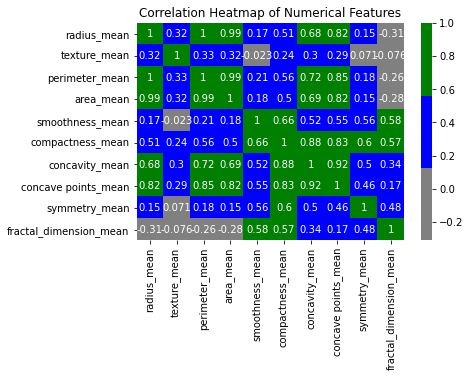

In [18]:
numerical_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True,cmap = sns.color_palette(["grey",'blue', 'green']))
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# SVM w Kernel trick and 9 most vital features

#### The features are the following ->X = 'concave points_worst','perimeter_worst', 'concavity_mean', 'radius_worst', 'perimeter_mean',"area_worst", 'radius_mean', 'area_mean', 'concavity_mean' 


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df[['concave points_worst','perimeter_worst', 'concavity_mean', 'radius_worst', 'perimeter_mean',"area_worst", 'radius_mean', 'area_mean', 'concavity_mean' ]]  
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.9473684210526315


In [30]:
#RBF Gaussian
svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9473684210526315


In [31]:
#Polynomial
svm = SVC(kernel='poly')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [33]:
#Linear

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9912280701754386


#### Visualizing Linear Kernel SVM on features pair by pair

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df = pd.read_csv("breast-cancer.csv")
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

Accuracy: 0.9649122807017544


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


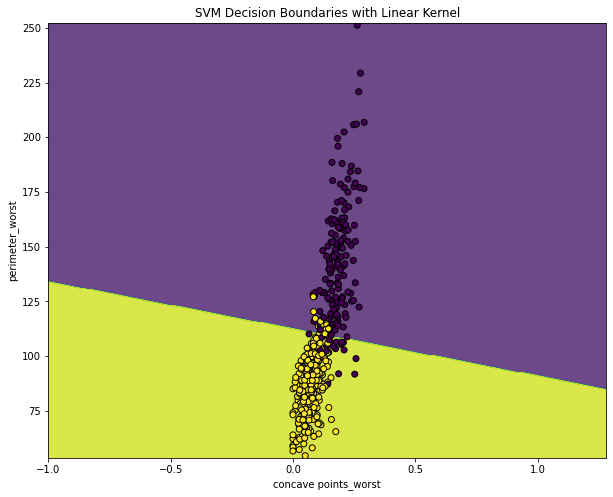

In [68]:
X = df[['concave points_worst', 'perimeter_worst']]
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

h = 0.02
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k')
plt.xlabel('concave points_worst')
plt.ylabel('perimeter_worst')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()




Accuracy: 0.9473684210526315


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


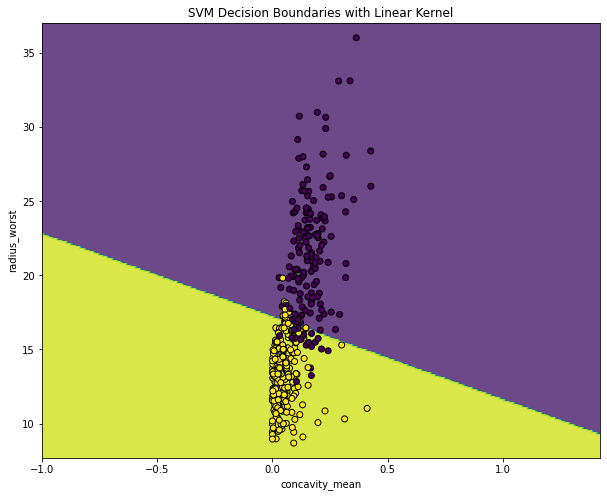

In [70]:
X = df[['concavity_mean', 'radius_worst']]
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

h = 0.02
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k')
plt.xlabel('concavity_mean')
plt.ylabel('radius_worst')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()


In [ ]:
# numerical_features = [ 'perimeter_mean',"area_worst"]
# corr_matrix = df[numerical_features].corr()
# sns.heatmap(corr_matrix, annot=True,cmap = sns.color_palette(["grey",'blue', 'green']))
# plt.title('Correlation Heatmap of Numerical Features')
# plt.show()


Accuracy: 0.9035087719298246


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


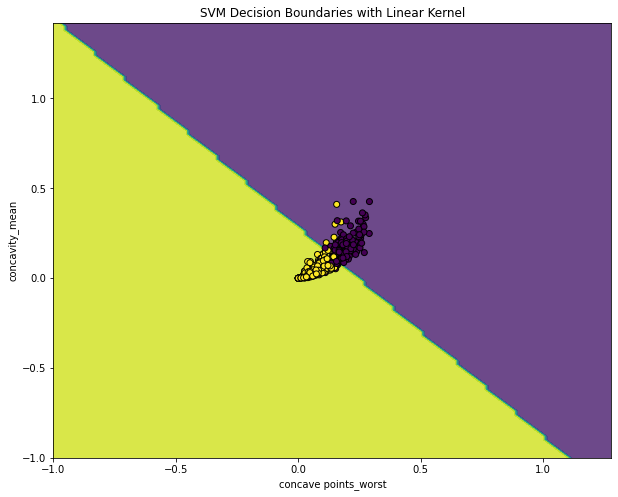

Accuracy: 0.9035087719298246


In [72]:

X = df[['concave points_worst', 'concavity_mean']]
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

h = 0.02
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,  edgecolor='k')
plt.xlabel('concave points_worst')
plt.ylabel( 'concavity_mean')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()

print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


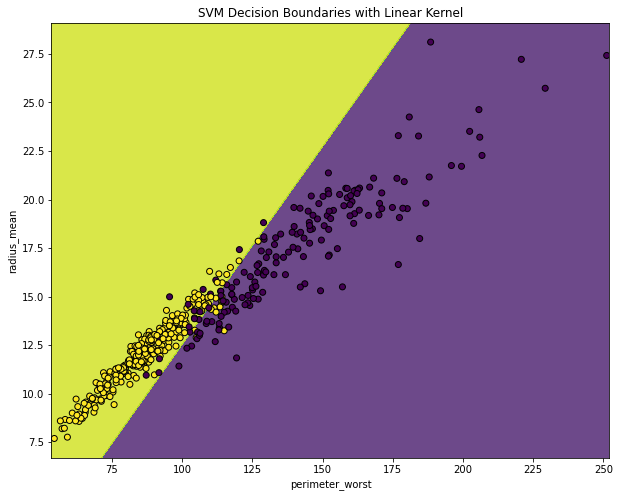

In [74]:

X = df[['perimeter_worst', 'radius_mean']]
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

h = 0.02
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,  edgecolor='k')
plt.xlabel('perimeter_worst')
plt.ylabel( 'radius_mean')
plt.title('SVM Decision Boundaries with Linear Kernel')
plt.show()


In [27]:
#pairwise correlations
import pandas as pd

features = ['concave points_worst', 'perimeter_worst', 'concavity_mean', 'radius_worst',
            'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean']

selected_features = df[features]
correlations = selected_features.corr()
print(correlations)



                      concave points_worst  perimeter_worst  concavity_mean  \
concave points_worst              1.000000         0.816322        0.861323   
perimeter_worst                   0.816322         1.000000        0.729565   
concavity_mean                    0.861323         0.729565        1.000000   
radius_worst                      0.787424         0.993708        0.688236   
perimeter_mean                    0.771241         0.970387        0.716136   
area_worst                        0.747419         0.977578        0.675987   
radius_mean                       0.744214         0.965137        0.676764   
area_mean                         0.722017         0.959120        0.685983   
concavity_mean                    0.861323         0.729565        1.000000   

                      radius_worst  perimeter_mean  area_worst  radius_mean  \
concave points_worst      0.787424        0.771241    0.747419     0.744214   
perimeter_worst           0.993708        0.970387 